# INDICATORS:

1. Bollinger Bands
2. Standard Deviation
3. ATR
4. Chaikin Volatility

In [125]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
# IMPORTING CSV

df = pd.read_csv('indicator_data.csv')

In [17]:
df

,Time,Open,High,Low,Close,IV
0,20240108-09:15,4824697.5,4824842.5,4822195.0,4823515.0,0.135038
1,20240108-09:16,4823107.5,4829270.0,4822602.5,4828215.0,0.134058
2,20240108-09:17,4828222.5,4830925.0,4828222.5,4828937.5,0.135336
3,20240108-09:18,4828665.0,4830190.0,4828665.0,4829157.5,0.135456
4,20240108-09:19,4829202.5,4829495.0,4828415.0,4828850.0,0.135756
...,...,...,...,...,...,...
9750,20240318-15:26,4676335.0,4677165.0,4676267.5,4677027.5,0.173372
9751,20240318-15:27,4677057.5,4678445.0,4677057.5,4678355.0,0.172366
9752,20240318-15:28,4678455.0,4678865.0,4678195.0,4678715.0,0.172936
9753,20240318-15:29,4678730.0,4679142.5,4678105.0,4678502.5,0.173196


In [127]:
####################  how long should be a period  ###################


df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M')

df_1 = df.set_index('Time').resample('45T').agg({                   ######### change ("X"T)   X = No of periods.
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'IV': 'mean'
}).dropna()

df_1 = df_1.reset_index()

df_1['Time'] = df_1['Time'].dt.strftime('%Y%m%d-%H:%M')
df_1 = df_1.drop(df_1.index[-1])

df_1.head()


,Time,Open,High,Low,Close,IV
0,20240108-09:00,4824697.5,4836070.0,4815470.0,4819570.0,0.134940
1,20240108-09:45,4819335.0,4821280.0,4810785.0,4819235.0,0.133907
2,20240108-10:30,4819232.5,4831802.5,4802975.0,4808282.5,0.130430
3,20240108-11:15,4807985.0,4812800.0,4796372.5,4797762.5,0.130139
4,20240108-12:00,4798032.5,4809195.0,4794412.5,4807872.5,0.131405


# BOLLINGER BANDS:

Bollinger Bands are a tool used in stock trading to show the volatility and potential price levels of an asset. They consist of three lines: a middle line - MB (SMA), an upper band - UB (2 standard deviations above the SMA), and a lower band - LB (2 standard deviations below the SMA). Traders use them to identify potential overbought (sell signal) or oversold (buy signal) conditions in the market.

In [128]:
df_BB = df_1.copy()
df_BB["MB"] = df_BB["Close"].rolling(10).mean()
df_BB["UB"] = df_BB["MB"] + 2 * df_BB["Close"].rolling(10).std(ddof=0)
df_BB["LB"] = df_BB["MB"] - 2 * df_BB["Close"].rolling(10).std(ddof=0)
df_BB["BB_width"] = df_BB["UB"] - df_BB["LB"]

df_BB = df_BB.round({'MB': 3, 'UB': 3, 'LB': 3, 'BB_width': 3})

In [129]:
# Replace infinite values with NaN
df_BB.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_BB.dropna(inplace=True)

In [13]:
#df_BB_slice = df_B.iloc[6340:6400]
df_BB.head(100)

,Time,Open,High,Low,Close,IV,MB,UB,LB,BB_width
9,20240108-09:24,4833495.0,4836070.0,4832882.5,4835895.0,0.135446,4828971.00,4835277.500,4822664.500,12612.999
10,20240108-09:25,4835997.5,4835997.5,4831907.5,4833707.5,0.134667,4829990.25,4835707.159,4824273.341,11433.819
11,20240108-09:26,4833077.5,4833187.5,4832022.5,4832477.5,0.134135,4830416.50,4836175.862,4824657.138,11518.725
12,20240108-09:27,4831862.5,4832407.5,4830327.5,4830327.5,0.133991,4830555.50,4836231.869,4824879.131,11352.738
13,20240108-09:28,4830047.5,4830047.5,4825547.5,4825710.0,0.133186,4830210.75,4836563.351,4823858.149,12705.202
...,...,...,...,...,...,...,...,...,...,...
104,20240108-10:59,4809117.5,4809952.5,4807960.0,4808320.0,0.131901,4813630.25,4822267.831,4804992.669,17275.162
105,20240108-11:00,4808822.5,4810377.5,4806932.5,4809895.0,0.130321,4812366.50,4818854.979,4805878.021,12976.958
106,20240108-11:01,4809797.5,4810525.0,4809220.0,4809237.5,0.129929,4811552.25,4817323.778,4805780.722,11543.055
107,20240108-11:02,4809205.0,4810125.0,4809062.5,4809657.5,0.130724,4810964.75,4816163.690,4805765.810,10397.881


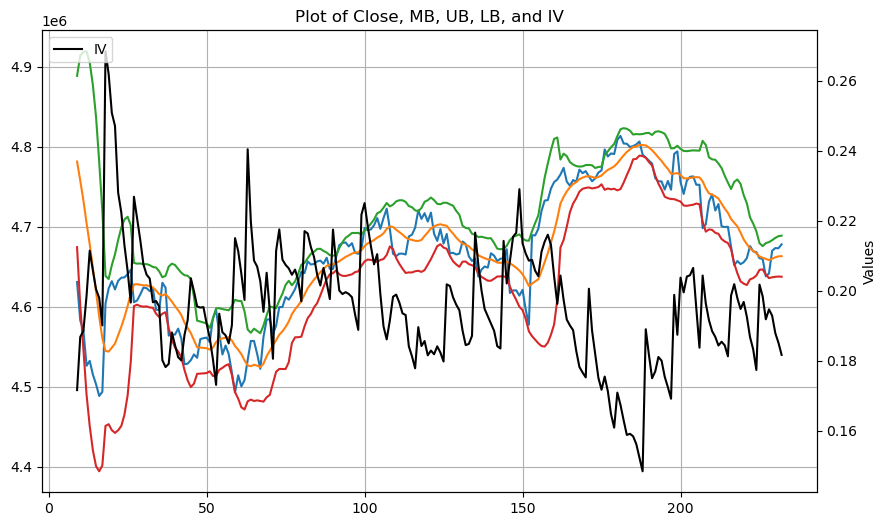

In [130]:
df_BB["Close"] = pd.to_numeric(df_BB["Close"], errors="coerce", downcast="float")

plt.figure(figsize=(10, 6))
plt.grid()

plt.plot(df_BB.index, df_BB["Close"], label="Close")
plt.plot(df_BB.index, df_BB["MB"], label="MB")
plt.plot(df_BB.index, df_BB["UB"], label="UB")
plt.plot(df_BB.index, df_BB["LB"], label="LB")

ax2 = plt.gca().twinx()
ax2.plot(df_BB.index, df_BB["IV"], label="IV", color='black')

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Plot of Close, MB, UB, LB, and IV")
plt.legend(loc='upper left')
plt.show()

In [35]:
df_BB['Date'] = pd.to_datetime(df_BB['Time'].str.split('-').str[0])
df_BB["iv_ret"] = df_BB["IV"].shift(-1) - df_BB["IV"]

df_BB["signal_"] = np.where(df_BB["Date"].shift(-1) != df_BB["Date"], 0,
                            np.where(df_BB["Close"] > df_BB["MB"], -1, np.where(df_BB["Close"] < df_BB["UB"], 1, 0)))

df_BB["pnl_"] = df_BB["signal_"] * df_BB["iv_ret"]

#df_BB["date"] = df_BB["Time"].apply(lambda x:x.split("-")[0])
#df_BB.loc[df_BB.groupby('date').tail(1).index, 'pnl_'] = 0

df_BB["pnl_ret"] = df_BB["pnl_"].cumsum()

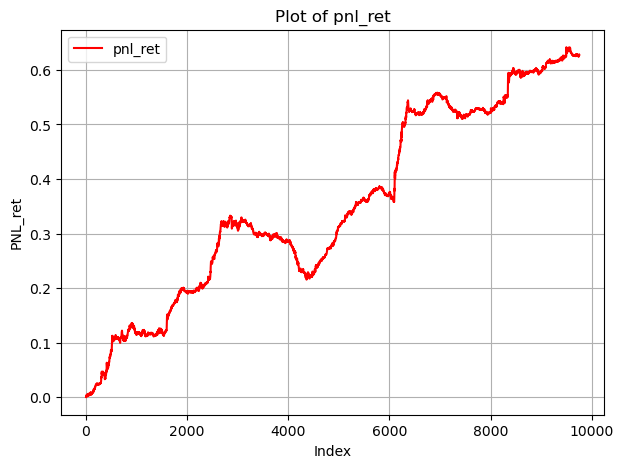

In [36]:
df_BB["pnl_ret"] = pd.to_numeric(df_BB["pnl_ret"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()

plt.plot(df_BB.index, df_BB["pnl_ret"], label="pnl_ret", color='red')
plt.legend(loc='upper left')

plt.xlabel("Index")
plt.ylabel("PNL_ret")
plt.title("Plot of pnl_ret")
plt.legend(loc='upper left')
plt.show()

# STANDARD DEVIATION:

The standard deviation indicator measures the dispersion or variability of data points from the mean (average). In financial markets, it's often used to assess the volatility of an asset's price movements. A higher standard deviation indicates greater volatility, while a lower standard deviation suggests less volatility. Traders use this indicator to gauge potential price fluctuations and assess risk levels in trading strategies.

In [112]:
df_SD = df_1.copy()
df_SD["Close_ret"] = df_SD["Close"] - df_SD["Close"].shift(1)
df_SD["Close_ema"] = df_SD["Close"].ewm(span=20, min_periods=20).mean()

df_SD = df_SD.round({'Close_ema': 3})

df_SD.head()

,Time,Open,High,Low,Close,IV,Close_ret,Close_ema
0,20240108-09:15,4824697.5,4824842.5,4822195.0,4823515.0,0.135038,NaN,NaN
1,20240108-09:16,4823107.5,4829270.0,4822602.5,4828215.0,0.134058,4700.0,NaN
2,20240108-09:17,4828222.5,4830925.0,4828222.5,4828937.5,0.135336,722.5,NaN
3,20240108-09:18,4828665.0,4830190.0,4828665.0,4829157.5,0.135456,220.0,NaN
4,20240108-09:19,4829202.5,4829495.0,4828415.0,4828850.0,0.135756,-307.5,NaN


In [113]:
SD_1 = df_SD["Close_ret"].std()
print(SD_1)
SD_2 = 2 * df_SD["Close_ret"].std()
print(SD_2)
SD_3 = 3 * df_SD["Close_ret"].std()
print(SD_3)

3352.1854481478085
6704.370896295617
10056.556344443426


In [114]:
df_SD["ema+1SD"] = df_SD["Close_ema"] + SD_1
df_SD["ema-1SD"] = df_SD["Close_ema"] - SD_1

df_SD["ema+2SD"] = df_SD["Close_ema"] + SD_2
df_SD["ema-2SD"] = df_SD["Close_ema"] - SD_2

df_SD["ema+3SD"] = df_SD["Close_ema"] + SD_3
df_SD["ema-3SD"] = df_SD["Close_ema"] - SD_3

df_SD = df_SD.round({'ema+1SD': 3, 'ema-1SD': 3, 'ema+2SD': 3, 'ema-2SD': 3, 'ema+3SD': 3, 'ema-3SD': 3})

# Replace infinite values with NaN
df_SD.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_SD.dropna(inplace=True)

df_SD.head()

,Time,Open,High,Low,Close,IV,Close_ret,Close_ema,ema+1SD,ema-1SD,ema+2SD,ema-2SD,ema+3SD,ema-3SD
19,20240108-09:34,4823605.0,4823817.5,4821552.5,4821605.0,0.134506,-2047.5,4826964.483,4830316.668,4823612.298,4833668.854,4820260.112,4837021.039,4816907.927
20,20240108-09:35,4822007.5,4823560.0,4821645.0,4822490.0,0.134373,885.0,4826478.995,4829831.180,4823126.810,4833183.366,4819774.624,4836535.551,4816422.439
21,20240108-09:36,4822257.5,4822260.0,4818705.0,4820335.0,0.135872,-2155.0,4825821.088,4829173.273,4822468.903,4832525.459,4819116.717,4835877.644,4815764.532
22,20240108-09:37,4821537.5,4822135.0,4818345.0,4818535.0,0.135343,-1800.0,4825050.016,4828402.201,4821697.831,4831754.387,4818345.645,4835106.572,4814993.460
23,20240108-09:38,4819095.0,4819095.0,4816892.5,4817292.5,0.136825,-1242.5,4824237.657,4827589.842,4820885.472,4830942.028,4817533.286,4834294.213,4814181.101


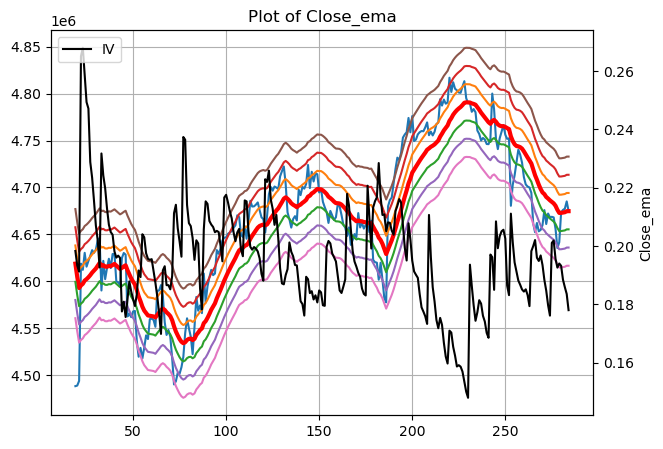

In [105]:
df_SD["Close_ema"] = pd.to_numeric(df_SD["Close_ema"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()

plt.plot(df_SD.index, df_SD["Close"], label="Close")

plt.plot(df_SD.index, df_SD["Close_ema"], label="Close_ema", color='red', linewidth = '3')

plt.plot(df_SD.index, df_SD["ema+1SD"], label="ema+1SD")
plt.plot(df_SD.index, df_SD["ema-1SD"], label="ema-1SD")

plt.plot(df_SD.index, df_SD["ema+2SD"], label="ema+2SD")
plt.plot(df_SD.index, df_SD["ema-2SD"], label="ema-2SD")

plt.plot(df_SD.index, df_SD["ema+3SD"], label="ema+3SD")
plt.plot(df_SD.index, df_SD["ema-3SD"], label="ema-3SD")

ax2 = plt.gca().twinx()
ax2.plot(df_SD.index, df_SD["IV"], label="IV", color='black')
#plt.plot(df_SD.index, df_SD["IV"], label="IV", linewidth = '3', color='black')

plt.legend(loc='upper left')


plt.xlabel("Index")
plt.ylabel("Close_ema")
plt.title("Plot of Close_ema")
plt.legend(loc='upper left')
plt.show()


In [115]:
df_SD['Time'] = df_SD['Time'].astype(str)

df_SD['Date'] = pd.to_datetime(df_SD['Time'].str.split('-').str[0])
df_SD["iv_ret"] = df_SD["IV"].shift(-1) - df_SD["IV"]


df_SD["signal_"] = np.where(df_SD["Date"].shift(-1) != df_SD["Date"], 0,
                            np.where(df_SD["Close"] > df_SD["ema+1SD"], -1,np.where(df_SD["Close"] < df_SD["ema-1SD"], 1, 0)))

df_SD["pnl_"] = df_SD["signal_"] * df_SD["iv_ret"]
df_SD["pnl_ret"] = df_SD["pnl_"].cumsum()

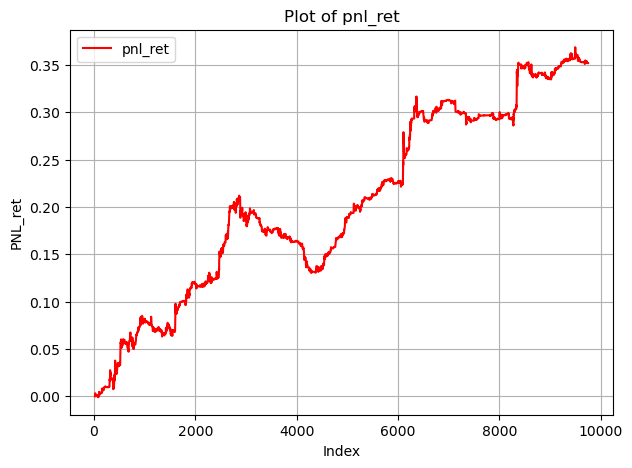

In [116]:
df_SD["pnl_ret"] = pd.to_numeric(df_SD["pnl_ret"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()

plt.plot(df_SD.index, df_SD["pnl_ret"], label="pnl_ret", color='red')
plt.legend(loc='upper left')

plt.xlabel("Index")
plt.ylabel("PNL_ret")
plt.title("Plot of pnl_ret")
plt.legend(loc='upper left')
plt.show()


# ATR:


The Average True Range (ATR) indicator measures market volatility by calculating the average range between high and low prices over a specified period, typically 14 days by default. It accounts for gaps and limit moves and is useful for determining stop-loss levels and assessing potential price movements. A higher ATR suggests higher volatility and vice versa. Traders use the ATR to adjust their strategies based on market conditions and risk tolerance.

In [117]:
df_ATR = df_1.copy()
df_ATR["H-L"] = df_ATR["High"] - df_ATR["Low"]
df_ATR["H-PC"] = abs(df_ATR["High"] - df_ATR["Close"].shift(1))
df_ATR["L-PC"] = abs(df_ATR["Low"] - df_ATR["Close"].shift(1))
df_ATR["TR"] = df_ATR[["H-L", "H-PC", "L-PC"]].max(axis=1)
df_ATR["ATR"] = df_ATR["TR"].ewm(span=30, min_periods=30).mean()
df_ATR["ATR_ema"] = df_ATR["ATR"].ewm(span=7, min_periods=7).mean()

# Replace infinite values with NaN
df_ATR.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_ATR.dropna(inplace=True)

df_ATR.head()
#df_1.tail()


,Time,Open,High,Low,Close,IV,H-L,H-PC,L-PC,TR,ATR,ATR_ema
35,20240108-09:50,4815532.5,4816952.5,4815192.5,4816475.0,0.136588,1760.0,1592.5,167.5,1760.0,2626.453662,2754.731862
36,20240108-09:51,4816577.5,4818130.0,4815820.0,4817807.5,0.136276,2310.0,1655.0,655.0,2310.0,2604.145821,2712.897158
37,20240108-09:52,4817807.5,4818812.5,4817205.0,4818062.5,0.135590,1607.5,1005.0,602.5,1607.5,2534.306473,2664.624986
38,20240108-09:53,4817775.0,4817775.0,4813182.5,4815150.0,0.135200,4592.5,287.5,4880.0,4880.0,2697.770937,2673.405961
39,20240108-09:54,4815090.0,4818622.5,4814750.0,4817830.0,0.134457,3872.5,3472.5,400.0,3872.5,2779.213209,2701.024234


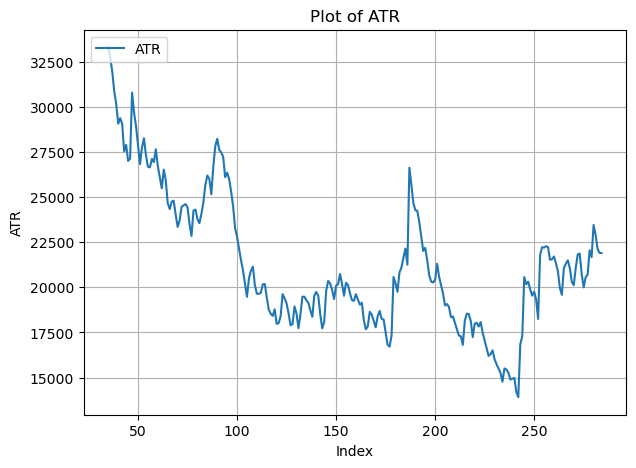

In [107]:
df_ATR["ATR"] = pd.to_numeric(df_ATR["ATR"], errors="coerce", downcast="float")
#df_ATR["pnl_ret"] = pd.to_numeric(df_ATR["pnl_ret"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()
plt.plot(df_ATR.index, df_ATR["ATR"], label="ATR")
plt.legend(loc='upper left')
#plt.plot(df_ATR.index, df_ATR["pnl_ret"], label="pnl_ret", color='red')
#plt.legend(loc='upper left')

#ax2 = plt.gca().twinx()
#ax2.plot(df_ATR.index, df_ATR["pnl_ret"], label="pnl_ret", color='red')

plt.xlabel("Index")
plt.ylabel("ATR")
plt.title("Plot of ATR")
plt.legend(loc='upper left')
plt.show()


In [118]:
df_ATR["iv_ema"] = df_ATR["IV"].ewm(span=60, adjust=False).mean()

df_ATR['Time'] = df_ATR['Time'].astype(str)

df_ATR['Date'] = pd.to_datetime(df_ATR['Time'].str.split('-').str[0])
df_ATR["iv_ret"] = df_ATR["IV"].shift(-1) - df_1["IV"]

df_ATR["signal_"] = np.where(df_ATR["Date"].shift(-1) != df_ATR["Date"], 0,
                            np.where(df_ATR["ATR"] > df_ATR["ATR_ema"], 1, -1))

df_ATR["pnl_"] = df_ATR["signal_"] * df_ATR["iv_ret"]
df_ATR["pnl_ret"] = df_ATR["pnl_"].cumsum()

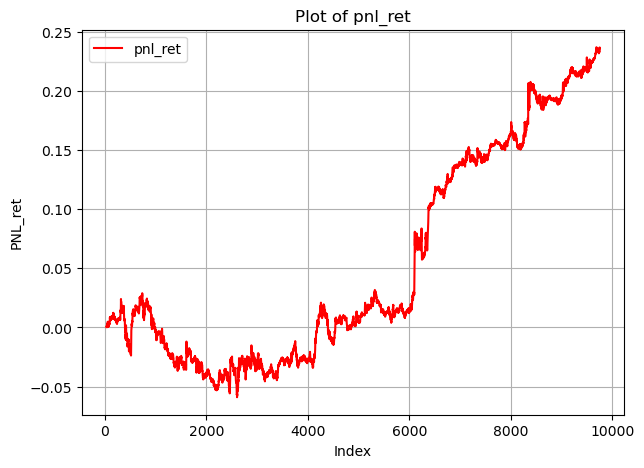

In [119]:
df_ATR["pnl_ret"] = pd.to_numeric(df_ATR["pnl_ret"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()

plt.plot(df_ATR.index, df_ATR["pnl_ret"], label="pnl_ret", color='red')
plt.legend(loc='upper left')

plt.xlabel("Index")
plt.ylabel("PNL_ret")
plt.title("Plot of pnl_ret")
plt.legend(loc='upper left')
plt.show()

# Chaikin Volatility:

The Chaikin Volatility indicator measures the volatility of an asset's price movements by comparing the difference between its high and low prices over a specific period. High Chaikin Volatility indicates significant price fluctuations, signaling a more volatile market, while low Chaikin Volatility suggests price stability. Traders use this indicator to adjust risk management and trading strategies based on market volatility levels.

In [120]:
df_CV = df_1.copy()
df_CV["H-L"] = df_CV["High"] - df_CV["Low"]
df_CV["H-L_ema"] = df_CV["H-L"].ewm(span=10, min_periods=10).mean()

# Calculate Chaikin Volatility (CV)
df_CV["CV"] = ((df_CV["H-L_ema"] - df_CV["H-L_ema"].shift(10)) / df_CV["H-L_ema"].shift(10)) * 100

# Replace infinite values with NaN
df_CV.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_CV.dropna(inplace=True)

In [121]:
max_ = df_CV["CV"].max()
max_

415.05947899421267

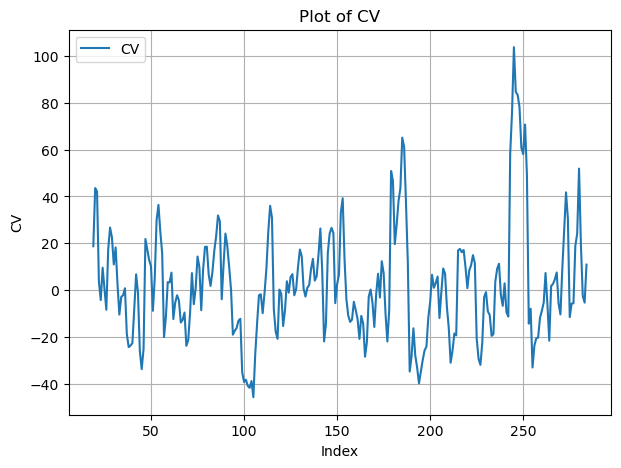

In [110]:
df_CV["CV"] = pd.to_numeric(df_CV["CV"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()
plt.plot(df_CV.index, df_CV["CV"], label="CV")
plt.legend(loc='upper left')

plt.xlabel("Index")
plt.ylabel("CV")
plt.title("Plot of CV")
plt.legend(loc='upper left')
plt.show()


In [122]:
df_CV['Time'] = df_CV['Time'].astype(str)

df_CV['Date'] = pd.to_datetime(df_CV['Time'].str.split('-').str[0])
df_CV["iv_ret"] = df_CV["IV"].shift(-1) - df_CV["IV"] 

df_CV["signal_"] = np.where(df_CV["Date"].shift(-1) != df_CV["Date"], 0,
                            np.where(df_CV["CV"] < -1, -1, np.where(df_CV["CV"] > 1, 1, 0)))

df_CV["pnl_"] = df_CV["signal_"] * df_CV["iv_ret"]
df_CV["pnl_ret"] = df_CV["pnl_"].cumsum()

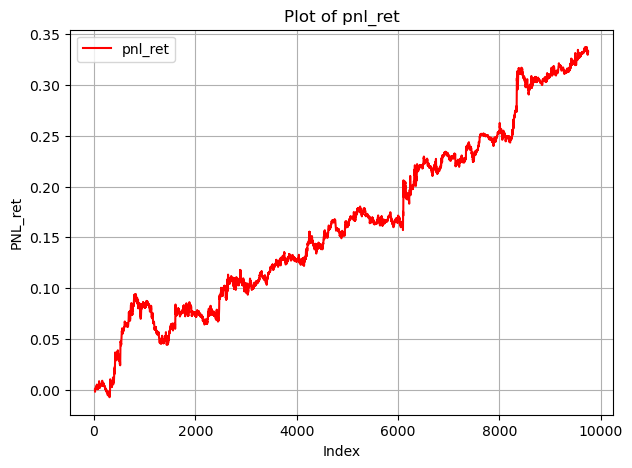

In [123]:
df_CV["pnl_ret"] = pd.to_numeric(df_CV["pnl_ret"], errors="coerce", downcast="float")

plt.figure(figsize=(7, 5))
plt.grid()

plt.plot(df_CV.index, df_CV["pnl_ret"], label="pnl_ret", color='red')
plt.legend(loc='upper left')


plt.xlabel("Index")
plt.ylabel("PNL_ret")
plt.title("Plot of pnl_ret")
plt.legend(loc='upper left')
plt.show()
